In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline


import os

In [2]:
bank = pd.read_csv('bank/bank-full.csv', sep=';', decimal=",")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
# Проверим выборку на сбалансированность (будем считать, что классы несбалансированы, 
# если объем одного класса превосходит объем другого в 10 и больше раз)

bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Класс "no" превышает по объему класс "yes" в 7,5 раз

Вывод: классы сбалансированы

In [36]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Преобразовать данные из object в int можно долго и нудно (как показано на примере преобразования класса "job") или быстрым способом (используя LabelEncoder())

In [39]:
job_map = {'management': 1, 'technician': 2, 'entrepreneur': 3, 'blue-collar': 4, 'admin.': 5, 'housemaid': 6, 'retired': 7, 'self-employed': 8, 'services': 9, 'student': 10, 'unemployed': 11, 'unknown': 12}
bank['job'] = bank['job'].map(job_map)

In [40]:
bank['job'].astype('int')

0         1
1         2
2         3
3         4
4        12
         ..
45206     2
45207     7
45208     7
45209     4
45210     3
Name: job, Length: 45211, dtype: int64

In [42]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,2,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,3,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,4,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,12,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [57]:
bank['marital'] = labelencoder.fit_transform(bank['marital'])
bank['education'] = labelencoder.fit_transform(bank['education'])
bank['default'] = labelencoder.fit_transform(bank['default'])
bank['housing'] = labelencoder.fit_transform(bank['housing'])
bank['loan'] = labelencoder.fit_transform(bank['loan'])
bank['contact'] = labelencoder.fit_transform(bank['contact'])
bank['month'] = labelencoder.fit_transform(bank['month'])
bank['poutcome'] = labelencoder.fit_transform(bank['poutcome'])
bank['y'] = labelencoder.fit_transform(bank['y'])

In [58]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,2,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,3,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,4,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,12,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [59]:
bank.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [61]:
X = bank.iloc[:, :-1].values  
y = bank.iloc[:, 16].values 

In [62]:
X[:5, :]

array([[  58,    1,    1,    2,    0, 2143,    1,    0,    2,    5,    8,
         261,    1,   -1,    0,    3],
       [  44,    2,    2,    1,    0,   29,    1,    0,    2,    5,    8,
         151,    1,   -1,    0,    3],
       [  33,    3,    1,    1,    0,    2,    1,    1,    2,    5,    8,
          76,    1,   -1,    0,    3],
       [  47,    4,    1,    3,    0, 1506,    1,    0,    2,    5,    8,
          92,    1,   -1,    0,    3],
       [  33,   12,    2,    3,    0,    1,    0,    0,    2,    5,    8,
         198,    1,   -1,    0,    3]])

In [63]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split  

# Разделим выборку на обучающую и тестовую (0.33 от всей выборки)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 1234)  

In [67]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler   #   среднее 0, ст.отклонение 1
#  from sklearn.preprocessing import MinMaxScaler  #  к интервалу [0,1]

scaler = StandardScaler()   #   среднее 0, ст.отклонение 1
#  scaler = MinMaxScaler()  #   к интервалу [0,1] 

scaler.fit(X_train)

StandardScaler()

In [68]:
X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test) 

In [69]:
from sklearn.neighbors import KNeighborsClassifier  

In [70]:
#  Построение классификатора

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_2, y_train)  


KNeighborsClassifier(n_neighbors=5, 
        algorithm='auto',   
        leaf_size=30,       
        metric='minkowski', 
        p=2,                
        metric_params=None, 
        n_jobs=1,           
        weights='uniform')   

KNeighborsClassifier(n_jobs=1)

In [71]:
#  Используем классификатор на обучающей и тестовой выборках

y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [94]:
#  Строим таблицу сопряженности

print(u'Таблица сопряженности для обучающей выборки')
conf_mat = confusion_matrix(y_train, y_pred_train)

conf_mat_train = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_train

Таблица сопряженности для обучающей выборки


,0,1
0,26242,502
1,2358,1189


In [74]:
print('Accuracy на обучающей выборке', accuracy_score(y_train, y_pred_train, normalize=True))

Accuracy на обучающей выборке 0.9172691558548743


In [95]:
print(u'Таблица сопряженности для тестовой выборки')

conf_mat = confusion_matrix(y_test, y_pred_test)

conf_mat_test = pd.DataFrame(conf_mat, index=classifier.classes_, columns=classifier.classes_)
conf_mat_test

Таблица сопряженности для тестовой выборки


,0,1
0,12876,302
1,1260,482


In [76]:
print('Accuracy на тестовой выборке', accuracy_score(y_test, y_pred_test, normalize=True))

Accuracy на тестовой выборке 0.892627345844504


Определим оптимальное число ближайших соседей

In [78]:
#  error - доля ошибок при разных к

error_rate = [-9999]*40  

for i in range(1, 41):  
    knn_res = KNeighborsClassifier(n_neighbors=i)
    knn_res.fit(X_train_2, y_train)
    pred_i = knn_res.predict(X_test_2)
    error_rate[i-1]= np.mean(pred_i != y_test)


In [79]:
#  Посмотрим на долю ошибок при разных к
print(np.round_(error_rate, 2))

[0.13 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.1  0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.1  0.11 0.11 0.11 0.11 0.11
 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]


Text(0, 0.5, 'Доля ошибок')

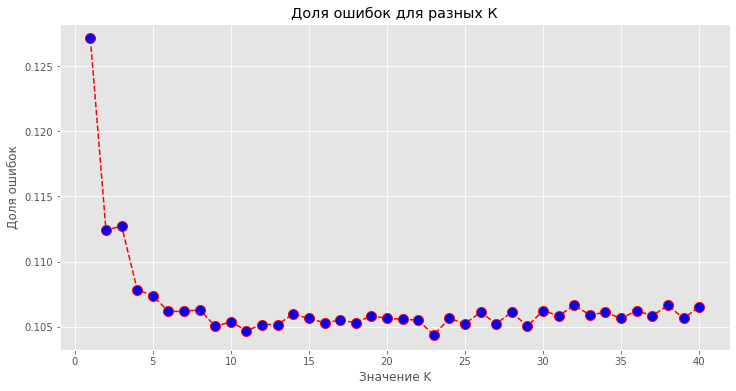

In [80]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 41), error_rate, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)

plt.title(u'Доля ошибок для разных К')  
plt.xlabel(u'Значение K')  
plt.ylabel(u'Доля ошибок')  


Вывод: Доли ошибок сильно не отличаются друг от друга (не считая случая, когда значение k=1)